# Немного о том, что тут происходит

Это мой ноутбук, посвященный реализации **алгоритма линейной классификации**, использующего в качестве основы **логистическую регрессию**. Линейная классификация реализована в виде класса. Для того, чтобы тренировать модель исходя из входных данных, необходимо сначала создать объект класса **Linear_classification_LogReg**, передав необходимые для обучения модели параметры, после чего тренировать модель, используя метод **fit()** класса Linear_classification_LogReg. Далее, уже с помощью функции **predict()**, можно предсказать значение таргета при даных значениях выборки.

# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Класс "Линейный классификатор LogReg"

In [2]:
class Linear_classification_LogReg():
    def __init__(self, learning_rate = 0.001, iterations_quant = 1000, reg_coefficient = 0.001):
        '''This is a logistic regression model class'''

        self.learning_rate = learning_rate
        self.iterations_quant = iterations_quant
        self.reg_coefficient = reg_coefficient
        self.w = None
        self.bias = None
    
    def fit(self, X, Y):
        '''This function we need for training the model on the training set'''

        self._df_rows_quant, self._df_columns_quant = X.shape
        self.w = np.random.rand(self._df_columns_quant)
        self.bias = 0
        self.X = X
        self.Y = Y

        for i in range(self.iterations_quant):
            d_w = np.zeros(self._df_columns_quant)
            d_bias = 0

            for k in range(self._df_rows_quant):
                d_w -= self.X[k] * (self.Y[k] - self._sigmoid(np.dot(self.X[k], self.w)))
                d_bias -= self.Y[k] - self._sigmoid(np.dot(self.X[k], self.w))

            self.w -= self.learning_rate * (2 * self.reg_coefficient * self.w + d_w)
            self.bias -= self.learning_rate * d_bias
    
    def _sigmoid(self, value):
        '''This function calculates the sigmoid value for an argument'''

        return 1 / (1 + np.exp(-value))

    def predict(self, X, threshold = 0.5):
        '''This function predicts the values ​​(class labels) for the sample that was passed as an argument'''

        if threshold >= 0 and threshold <= 1:
            sigmoid_value = self._sigmoid(np.dot(X, self.w) + self.bias)
            Y = np.where(sigmoid_value > threshold, 1, 0)
            
            return Y
        else:
            raise NameError('threshold must be on [0; 1]!')

# Инициализируем входные данные

## Для начала импортируем датасет

In [3]:
df = pd.read_csv("/content/sample_data/dataset_for_linear_classification_2.csv")
df

,x_1,x_2,y
0,3.395186,8.844288,1
1,5.551967,8.800227,1
2,7.689134,9.785068,1
3,5.772461,8.785153,1
4,0.428143,8.547947,1
...,...,...,...
305,0.398681,7.184006,1
306,7.871686,0.278526,0
307,5.450716,1.760866,0
308,8.971035,2.688999,0


## Теперь разделим его на список объектов и список соответствующих им таргетов

In [4]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1, 1)

## Сделаем разделение списка объектов и таргетов на тренировочные и тестовые

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 42)

X_test_len = len(X_test)
Y_test_len = len(Y_test)

# Создаем модель линейного классификатора и тренируем ее на нашем датасете

In [6]:
model = Linear_classification_LogReg(0.0001, 10000, 0.2)
model.fit(X_train, Y_train)

# Используя тестовую выборку, сделаем нужные предсказания

In [7]:
Y_pred = model.predict(X_test, 0.5)
Y_pred = Y_pred.reshape(-1, 1)

# Выведем данные, которые нам удалось найти (вектор w и сдвиг bias)

In [8]:
w_list = list(model.w)
bias = model.bias

print("bias after training:", bias, "\n")

for i, w_i in enumerate(w_list):
    print("w_{} =".format(i + 1), w_list[i])

bias after training: [-0.17327035] 

w_1 = -1.7776106595467753
w_2 = 1.7716496773181791


# Теперь выведем график, на котором будут отражены объекты тестовой выборки их истиные таргеты и предсказания модели

Вообще говоря, строить гиперплоскость необходимо немного по-другому, нежели в предыдущих алгоритмах. Разделяющая поверхность отделяет множество точек, которым мы присваиваем класс $0$, и множество точек, которым мы присваиваем класс $1$. Представляется логичным провести отсечку по какому-либо значению предсказанной вероятности. То есть, если вероятность класса $1$ больше, например, $0.5$, то мы предсказываем именно класс $1$, иначе, класс $0$. Как понятно из кода выше, мы решили провести границу по значению $0.5$. Тогда разделяющая поверхность как раз задаётся равенством $p_i = 0.5$, что равносильно $\langle w, x \rangle = 0$. А это и есть уравнение гиперплоскости.

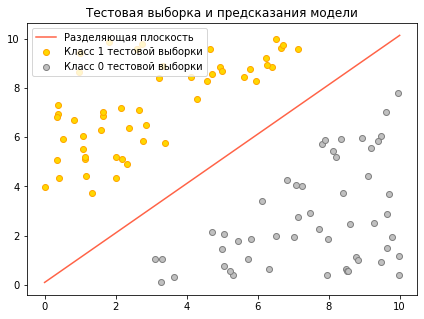

In [9]:
class_1_graph_x_1_values = []
class_1_graph_x_2_values = []

class_2_graph_x_1_values = []
class_2_graph_x_2_values = []

for i in range(Y_test_len):
    if Y_test[i] == 1:
        class_1_graph_x_1_values.append(X_test[i][0])
        class_1_graph_x_2_values.append(X_test[i][1])
    else:
        class_2_graph_x_1_values.append(X_test[i][0])
        class_2_graph_x_2_values.append(X_test[i][1])

separating_plane_horizontal_values = np.linspace(0, 10, 42)
separating_plane_vertical_values = -(w_list[0] * separating_plane_horizontal_values + bias) / w_list[1]

figure, ax = plt.subplots()

figure.set_figwidth(7)
figure.set_figheight(5)

ax.set_title('Тестовая выборка и предсказания модели')

ax.scatter(class_1_graph_x_1_values, class_1_graph_x_2_values, color = "gold",
           edgecolors='orange', label = "Класс 1 тестовой выборки")
ax.scatter(class_2_graph_x_1_values, class_2_graph_x_2_values, color = "silver",
           edgecolors='gray', label = "Класс 0 тестовой выборки")
ax.plot(separating_plane_horizontal_values, separating_plane_vertical_values,
        color = "tomato", label = "Разделяющая плоскость")

ax.legend()

plt.show()

# Покажем, насколько хорошо модель предсказала тестовую выборку

In [10]:
accuracy_score_value = accuracy_score(Y_test, Y_pred)
accuracy_score_value

1.0

# В дополнение к графику можно вывести две таблицы

## Таблица с истиными значениями таргетов для соответствующих объектов

In [11]:
test_df = pd.DataFrame(np.concatenate((X_test, Y_test), axis = 1, dtype = object),
             columns = ["x_1", "x_2", "y"])
test_df

,x_1,x_2,y
0,2.014962,5.194453,1
1,7.14824,2.771948,0
2,9.105824,4.402933,0
3,9.476643,6.059579,0
4,8.402912,3.739827,0
...,...,...,...
99,9.601205,7.00903,0
100,0.408263,4.353494,1
101,1.159999,4.431854,1
102,9.708678,3.704619,0


## Таблица с предсказанными значениями таргетов для соответствующих объектов

In [12]:
test_df = pd.DataFrame(np.concatenate((X_test, Y_pred), axis = 1, dtype = object),
             columns = ["x_1", "x_2", "y"])
test_df

,x_1,x_2,y
0,2.014962,5.194453,1
1,7.14824,2.771948,0
2,9.105824,4.402933,0
3,9.476643,6.059579,0
4,8.402912,3.739827,0
...,...,...,...
99,9.601205,7.00903,0
100,0.408263,4.353494,1
101,1.159999,4.431854,1
102,9.708678,3.704619,0


Как мы видим, классификатор справился очень даже хорошо!